# Partition Problem

Given a finite set $A$, and a size $s(a)\in\mathbb{Z}^+$ for each $a\in A$, is there a subset $A^{'}\subseteq A$, such that $\Sigma_{a\in A}s(a) = \Sigma_{a\in A-A^{'}}s(a)$.

In [11]:
import time
import random
import peqnp
import matplotlib.pyplot as plt

The $size$ and $bits$ for the sample set.

In [12]:
bits = 10
size = 100

The data generator and ploter of data

In [13]:
def plot(S, c=None):
    for s in S:
        if c:
            plt.bar(s, s, color=c, alpha=0.7)
        else:
            plt.bar(s, s, color='g', alpha=0.7)

def gen_data():
    if size % 2 != 0:
        raise Exception('Error: size != 0 mod 2')
    return sorted([random.randint(1, 2 ** bits) for _ in range(size)])

Generate the the sample set.

[7, 15, 16, 23, 47, 49, 64, 88, 88, 93, 95, 109, 118, 126, 130, 130, 158, 162, 163, 193, 202, 213, 216, 217, 223, 224, 226, 233, 281, 302, 302, 308, 310, 318, 323, 324, 330, 336, 349, 367, 368, 373, 395, 402, 407, 414, 425, 428, 440, 441, 453, 462, 489, 497, 512, 518, 523, 529, 535, 541, 541, 544, 570, 586, 614, 628, 636, 640, 643, 648, 663, 684, 706, 733, 752, 755, 756, 757, 772, 785, 786, 793, 805, 805, 813, 827, 830, 836, 841, 842, 859, 865, 883, 884, 892, 897, 920, 921, 999, 1011]


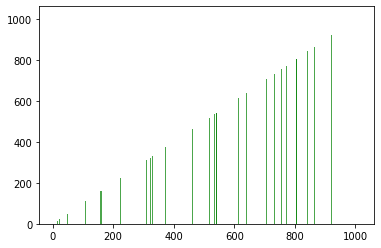

In [14]:
S = gen_data();
plot(S)
print(S)

Solution with **The Core** and **SLIME** SAT Solver.

23676 [16, 88, 93, 109, 126, 130, 130, 162, 163, 193, 202, 217, 224, 281, 302, 302, 310, 318, 323, 336, 367, 402, 414, 453, 489, 497, 512, 518, 523, 529, 544, 570, 586, 614, 640, 684, 733, 755, 756, 757, 772, 785, 786, 793, 805, 827, 830, 892, 897, 921]
23676 [7, 15, 23, 47, 49, 64, 88, 95, 118, 158, 213, 216, 223, 226, 233, 308, 324, 330, 349, 368, 373, 395, 407, 425, 428, 440, 441, 462, 535, 541, 541, 628, 636, 643, 648, 663, 706, 752, 805, 813, 836, 841, 842, 859, 865, 883, 884, 920, 999, 1011]
Time 5.09574818611145s


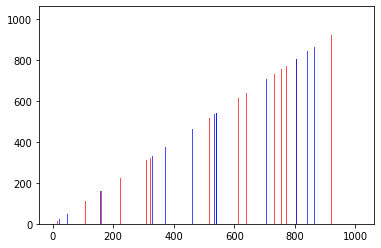

In [15]:
tc = peqnp.TheCore(bits=sum(S).bit_length(), key='partition', folder='/Volumes/RAM/')

slots = tc.int(size=len(S))

ini = time.time()

assert sum(tc.zero.iff(slots[i], S[i]) for i in range(len(S))) == sum(tc.zero.iff(-slots[i], S[i]) for i in range(len(S)))

if tc.satisfy([slots]):
    A = [S[i] for i in range(len(S)) if slots.binary[i]]
    B = [S[i] for i in range(len(S)) if not slots.binary[i]]
    if sum(A) == sum(B):
        print(sum(A), A)
        print(sum(B), B)
        plot(A, 'r')
        plot(B, 'b')
    else:
        raise Exception
elif tc.unsat:
    print('Infeasible...')
    
end = time.time()
print('Time {}s'.format(end - ini))